# Cosmologically Coupled Black Holes with Regular Horizons:
## field equations derivation

Here we verify and detail the field equations derivation from 2601.03296 [gr-qc] , by Cadoni, Lima, Pitzalis, Rodrigues and Sanna.

This code is based on the FTeV package , which can be downloaded from https://github.com/davi-rodrigues/FTeV

In [8]:
<< FTeV`

noArg[x_] := ReplaceAll[x, {y_[\[Eta]] -> y, y_[\[Eta], r] -> y}];

$Coordinates = {\[Eta], r, \[Theta], \[Phi]};

$Metric = a[\[Eta]]^2 DiagonalMatrix[{- Exp @ \[Alpha][\[Eta],r], Exp @ \[Beta][\[Eta],r], r^2, r^2 Sin[\[Theta]]^2}];


$Assumptions = {a[\[Eta]] > 0, r > 0, Exp[\[Beta][\[Eta],r]] > 0, Exp[\[Alpha][\[Eta],r]] > 0};

Fast Tensors eValuation v.0.13.4 (2025.03.17 16:20:28)
>> Help: Start by defining $Coordinates (coordinates names vector) and\
 
>    $Metric (the metric matrix).
>> Use tensorEvaluate["X"] or tev["X"] to compute X, where X can be: 
    * "Chr" for Christoffel symbol, 
    * "Riemann" for Riemann tensor, 
    * "Ricci" for Ricci tensor, 
    * "RicciS" for Ricci scalar, 
    * "G" for Einstein tensor, 
    * "Weyl" for Weyl tensor, 
    * "Kret" for Kretschmann scalar.


### ATTENTION: Although the FTeV package can run in a Jupyter notebook, it was not designed for such. Some outputs that cannot be properly presented in a Jupyter notebook were here ommited for clarity. But the meain results are below.

## Einstein equations

In the following, we will derive the field equations.

In [25]:
Gdd[] = Simplify[tev["G"]]; (*Einstien tensor with covariant indices*)
G[] = indices[Gdd[], "dd", "ud"] // Simplify; (*Einstein tensor with mixed indices*)

\[ScriptCapitalT][] = DiagonalMatrix[{-\[Rho][\[Eta],r], pp[\[Eta],r], pr[\[Eta],r], pr[\[Eta],r]}]; (*Energy momentum tensor with mixed indices*)
\[ScriptCapitalT][a_,b_] := \[ScriptCapitalT][][[a+1, b+1]];
G[a_,b_] := G[][[a+1, b+1]];

fieldEqs[] = G[] - k \[ScriptCapitalT][];
fieldEqs[a_,b_] := fieldEqs[][[a+1, b+1]];

k = 8\[Pi];

(* fieldEqs[] // TensorPrint *)

(0,1)    (1,0)
a' α        β
--------- + ------ == 0
    a         r
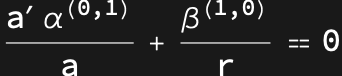

In [34]:
(*3a*)
fieldEqs[0,1]==0  // Simplify // MultiplySides[#, 1/(a[\[Eta]] r)] & // Expand // noArg

ruleBetaDot = Solve[fieldEqs[0,1]==0 , Derivative[1,0][\[Beta]][\[Eta],r]][[1,1]]; (*rule for \[Beta] replacement. It will be relevant latter*)
replaceBetaDot[x_] := ReplaceAll[x, ruleBetaDot];

α    α - β       2    α - β  (0,1)       (1,0)
   2  α         E    E        3 a'    E      β        a' β
8 a  E  Pi ρ == -- - ------ + ----- + ------------- + ---------
                 2      2       2           r             a
                r      r       a
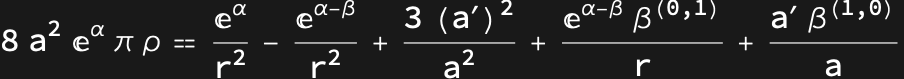

In [38]:
(*3b*)
fieldEqs[0,0]== 0  // Simplify // MultiplySides[#,  a[\[Eta]]^2 Exp[\[Alpha][\[Eta],r]]] & // Expand // noArg

β    -α + β   2      -α + β        (0,1)    -α + β     (1,0)
 -2   E    E       a'    2 E       a''   α        E       a' α            2  β
r   - -- + ----------- - ------------- + ------ + ----------------- == 8 a  E  Pi pp
       2        2              a           r              a
      r        a
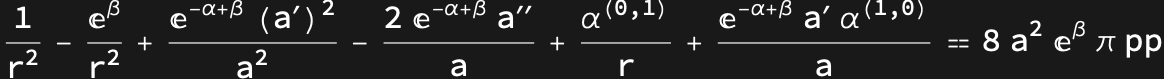

In [40]:
(*3c*)
fieldEqs[1,1] == 0 // Simplify // MultiplySides[#,  a[\[Eta]]^2 Exp[\[Beta][\[Eta],r]]] & // Expand //noArg

For the remainig equations, we use the energy momentum tensor conservation. 

In [47]:
d\[ScriptCapitalT][] = indices[
	DCov[indices[\[ScriptCapitalT][], "ud", "dd"]][], 
	"ddd", "udd"
] // Simplify; (*Defines the tensor  \[Del]^aSubscript[Subscript[T, b], c]. Note: DCoV is only defined for fully covariant tensors, hence "indices" is used before DCoV here.*)
d\[ScriptCapitalT][a_,b_, c_] := d\[ScriptCapitalT][][[a+1, b+1, c+1]]; 
div\[ScriptCapitalT][] = ToTensor[Contract[d\[ScriptCapitalT][aa, aa, b], aa], b]; (*Contracts the covariant derivative, yielding \[Del]^aSubscript[Subscript[T, a], b]. To avoid overlap with a[\[Eta]], do not contract an index named "a", "aa" works fine. The function Contract is not fully localized.*)
div\[ScriptCapitalT][a_] := div\[ScriptCapitalT][][[a+1]]; 
(* div\[ScriptCapitalT][] // TensorPrint *)

(0,1)      (0,1)
2 pp     (0,1)   pp α        ρ α         2 pr
---- + pp      + --------- + -------- == ----
 r                   2          2         r
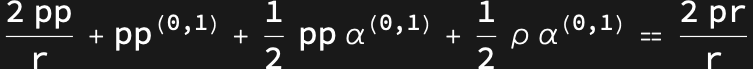

In [52]:
(*eq. 3e*)
div\[ScriptCapitalT][1] == 0 // Simplify // MultiplySides[#, 1/(2r)] & // Expand // noArg

rulePr = Solve[div\[ScriptCapitalT][1] == 0, pr[\[Eta],r]][[1,1]]; (*It will be useful latter*)
replacePr[x_] := ReplaceAll[x, rulePr];

(0,1)
3 pp a'   3 ρ a'   r a' pp         (1,0)
------- + ------ + ------------ + ρ      == 0
   a        a           a
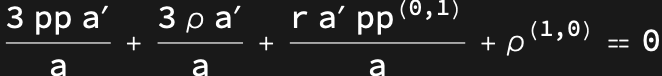

In [56]:
(*eq. 3d*)
ruleAlphaPrime = Solve[div\[ScriptCapitalT][1] == 0 // Simplify, Derivative[0,1][\[Alpha]][\[Eta],r]][[1,1]];
replaceAlphaPrime[x_] := ReplaceAll[x, ruleAlphaPrime];

div\[ScriptCapitalT][0] == 0  // replaceBetaDot // replaceAlphaPrime // Simplify // MultiplySides[#, 1/a[\[Eta]]] & // Expand // noArg
